<a href="https://colab.research.google.com/github/thejayden/IM4483-Mini-Proj/blob/master/im4483_tanjiadian_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

!pip install pillow

In [2]:
!git clone https://github.com/thejayden/IM4483-Mini-Proj.git

Cloning into 'IM4483-Mini-Proj'...
remote: Enumerating objects: 25522, done.
remote: Total 25522 (delta 0), reused 0 (delta 0), pack-reused 25522
Receiving objects: 100% (25522/25522), 1.01 GiB | 29.09 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (25502/25502), done.


In [3]:
train_cat_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train', 'cat')
train_dog_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train', 'dog')
train_cat_images = os.listdir(train_cat_dir)
train_dog_images = os.listdir(train_dog_dir)

category_cat = []
category_dog = []

for image in train_cat_images:
  category_cat.append("0")
df_train = pd.DataFrame({
    'filename': train_cat_images,
    'category': category_cat
})

for image in train_dog_images:
  category_dog.append("1")
df_train2 = pd.DataFrame({
    'filename': train_dog_images,
    'category': category_dog
})

df_train = df_train.append(df_train2)
df_train.shape

(20000, 2)

In [4]:
df_train_sample = df_train.sample(n=20)
print(df_train_sample)

           filename category
5521   dog.4016.jpg        1
4890   cat.9304.jpg        0
800   cat.12348.jpg        0
8711   cat.5084.jpg        0
9001   dog.6277.jpg        1
5229   cat.8973.jpg        0
5935  dog.12135.jpg        1
6741   cat.5349.jpg        0
7248   dog.6334.jpg        1
7816  dog.10403.jpg        1
4012    dog.895.jpg        1
4126   cat.2054.jpg        0
6809   dog.4420.jpg        1
5530   cat.9022.jpg        0
9782   cat.5736.jpg        0
3308   dog.3459.jpg        1
8011   cat.2462.jpg        0
5224  dog.11183.jpg        1
4362   cat.8327.jpg        0
8175   cat.4602.jpg        0


In [5]:
val_cat_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'val', 'cat')
val_dog_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'val', 'dog')
val_cat_images = os.listdir(val_cat_dir)
val_dog_images = os.listdir(val_dog_dir)

category_cat = []
category_dog = []

for image in val_cat_images:
  category_cat.append("0")
df_val = pd.DataFrame({
    'filename': val_cat_images,
    'category': category_cat
})

for image in val_dog_images:
  category_dog.append("1")
df_val2 = pd.DataFrame({
    'filename': val_dog_images,
    'category': category_dog
})

df_val = df_val.append(df_val2)
df_val.shape

(5000, 2)

In [6]:
df_val_sample = df_val.sample(n=20)
print(df_val_sample)

           filename category
2496   dog.1652.jpg        1
325    cat.7338.jpg        0
1764   dog.4081.jpg        1
268    dog.2048.jpg        1
118    dog.7902.jpg        1
982    cat.3067.jpg        0
2099   dog.5830.jpg        1
1944   cat.6507.jpg        0
1393  cat.12164.jpg        0
360    dog.2000.jpg        1
219    cat.1024.jpg        0
47    dog.12158.jpg        1
241   cat.10887.jpg        0
255    dog.2979.jpg        1
197    cat.7887.jpg        0
1012   cat.4296.jpg        0
893     dog.311.jpg        1
1114   cat.3412.jpg        0
1336   cat.5126.jpg        0
884    cat.7110.jpg        0


Text(0.5, 0, 'Dog = 1, Cat = 0')

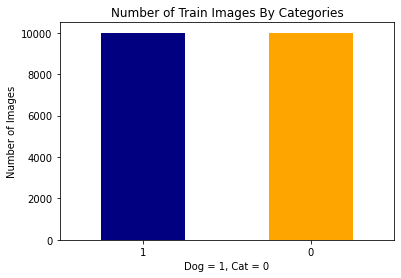

In [7]:
plt1 = df_train['category'].value_counts().plot(kind='bar', color=['navy','orange'], title='Number of Train Images By Categories', rot=0)
plt1.set_ylabel("Number of Images")
plt1.set_xlabel("Dog = 1, Cat = 0")

Text(0.5, 0, 'Dog = 1, Cat = 0')

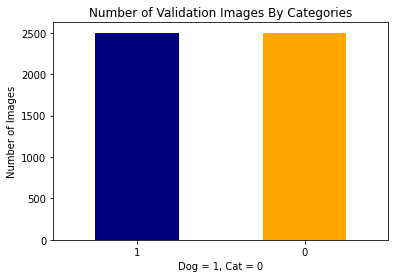

In [8]:
plt2 = df_val['category'].value_counts().plot(kind='bar', color=['navy','orange'], title='Number of Validation Images By Categories', rot=0)
plt2.set_ylabel("Number of Images")
plt2.set_xlabel("Dog = 1, Cat = 0")

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 10
batch_size = 100

keras.backend.clear_session()

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same", input_shape=input_shape),
   tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    # assert model.output_shape == (None, 112, 112, 64),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding="same"), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding="same"), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
          
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

# pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
# for layer in pre_trained_model.layers[:15]:
#     layer.trainable = False

# for layer in pre_trained_model.layers[15:]:
#     layer.trainable = True
    
# last_layer = pre_trained_model.get_layer('block5_pool')
# last_output = last_layer.output
    
# # Flatten the output layer to 1 dimension
# x = GlobalMaxPooling2D()(last_output)
# # Add a fully connected layer with 512 hidden units and ReLU activation
# x = Dense(512, activation='relu')(x)
# # Add a dropout rate of 0.5
# x = Dropout(0.5)(x)
# # Add a final sigmoid layer for classification
# x = layers.Dense(1, activation='sigmoid')(x)

# model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0

In [53]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 conv2d True
1 dropout True
2 max_pooling2d True
3 batch_normalization True
4 conv2d_1 True
5 dropout_1 True
6 max_pooling2d_1 True
7 batch_normalization_1 True
8 conv2d_2 True
9 dropout_2 True
10 max_pooling2d_2 True
11 batch_normalization_2 True
12 conv2d_3 True
13 dropout_3 True
14 max_pooling2d_3 True
15 batch_normalization_3 True
16 flatten True
17 dense True
18 dropout_4 True
19 dense_1 True


In [54]:
train_dest = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train')
for img in train_cat_images:
  os.rename(train_cat_dir + "/" + img, train_dest + "/" + img)

FileNotFoundError: ignored

In [55]:
for img in train_dog_images:
  os.rename(train_dog_dir + "/" + img, train_dest + "/" + img)

FileNotFoundError: ignored

In [56]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    df_train, 
    "./IM4483-Mini-Proj/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

# train_generator = train_datagen.flow_from_dataframe(
#     df_train, 
#     "./IM4483-Mini-Proj/train/dog/", 
#     x_col='filename',
#     y_col='category',
#     class_mode='binary',
#     target_size=(image_size, image_size),
#     batch_size=batch_size
# )

Found 20000 validated image filenames belonging to 2 classes.


          filename category
7925  dog.6342.jpg        1


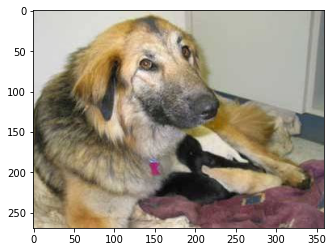

In [57]:
df_train_example = df_train.sample(n=1)
print(df_train_example)

sample = str(df_train_example.iloc[0]['filename'])

# print(sample)
# print("./IM4483-Mini-Proj/train/"+sample)

image = load_img("./IM4483-Mini-Proj/train/"+sample)
plt.imshow(image)

Found 1 validated image filenames belonging to 1 classes.


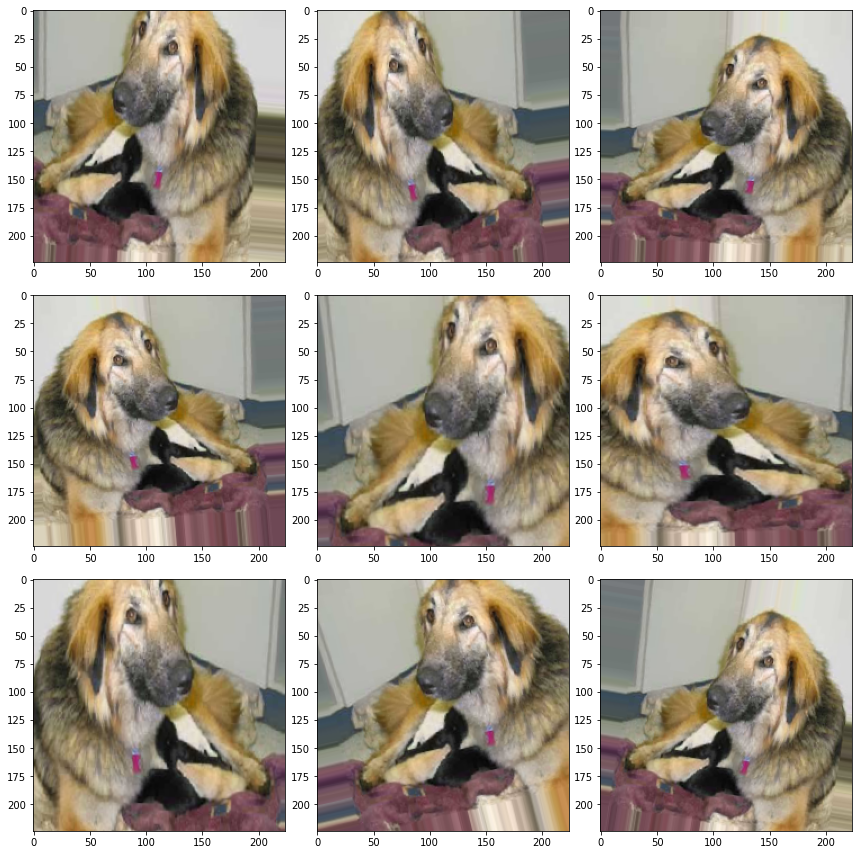

In [58]:
example_generator = train_datagen.flow_from_dataframe(
    df_train_example, 
    "./IM4483-Mini-Proj/train/", 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
)

plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [59]:
val_dest = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'val')
for img in val_cat_images:
  os.rename(val_cat_dir + "/" + img, val_dest + "/" + img)

FileNotFoundError: ignored

In [60]:
for img in val_dog_images:
  os.rename(val_dog_dir + "/" + img, val_dest + "/" + img)

FileNotFoundError: ignored

In [61]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    df_val, 
    "./IM4483-Mini-Proj/val/",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [62]:
total_train = df_train.shape[0]
total_validate = df_val.shape[0]

# fine-tune the model
# double forward slash is integer divison operation 
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 381s 2s/step - loss: 0.7242 - accuracy: 0.6328 - val_loss: 2.2179 - val_accuracy: 0.5000
Epoch 2/10
200/200 [==============================] - 377s 2s/step - loss: 0.6145 - accuracy: 0.6906 - val_loss: 3.4526 - val_accuracy: 0.5000
Epoch 3/10
200/200 [==============================] - 374s 2s/step - loss: 0.5640 - accuracy: 0.7179 - val_loss: 2.7539 - val_accuracy: 0.5000
Epoch 4/10
200/200 [==============================] - 364s 2s/step - loss: 0.5442 - accuracy: 0.7351 - val_loss: 3.1404 - val_accuracy: 0.5000
Epoch 5/10
200/200 [==============================] - 366s 2s/step - loss: 0.5295 - accuracy: 0.7429 - val_loss: 2.8813 - val_accuracy: 0.5000
Epoch 6/10
200/200 [==============================] - 360s 2s/step - loss: 0.5111 - accuracy: 0.7509 - val_loss: 2.9313 - val_accuracy: 0.5000
Epoch 7/10
200/200 [==============================] - 358s 2s/step - loss: 0.4944 - accuracy: 0.7596 - val_loss: 3.6022 - val_accuracy: 0.5000

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

In [ ]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

In [ ]:
# # Y_val = df_val['category']
# Y_val_convert = df_val['category'].astype('category')
# y_pred_convert =  model.predict_generator(validation_generator)

In [ ]:
# Y_val_convert

In [ ]:
# y_pred_convert

In [ ]:
# Y_val = df_val['category'].to_numpy()
# Y_val = df_val.to_numpy()
y_pred =  model.predict_generator(validation_generator)

In [ ]:
Y_val = df_val['category'].astype('int').to_numpy()
Y_val

In [ ]:
print(type(Y_val))
print(Y_val.size)

In [ ]:
y_pred

In [ ]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

In [ ]:
y_pred_2 = []
# y_final.size
for x in y_final:
  y_pred_2.append(x[0])
y_pred_2 = np.array(y_pred_2)
y_pred_2

In [ ]:
print(type(y_pred_2))
print(y_pred_2.size)

In [ ]:
# y_final.dtype

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val, y_pred_2) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="OrRd_r",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_val, y_pred_2, target_names=['0','1'])

print(report)

In [ ]:
test_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'test')
test_images = os.listdir(test_dir)

df_test = pd.DataFrame({
  'filename': test_images
})

# df_test.shape
print(df_test)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    "./IM4483-Mini-Proj/test/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(df_test.shape[0]/batch_size))
threshold = 0.5
df_test['category'] = np.where(predict > threshold, 1,0)

In [ ]:
sample_test = df_test.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./IM4483-Mini-Proj/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [ ]:
submission_df = df_test.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)

directory = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'submission_jiadian.csv')

# if not os.path.exists(directory):
#   os.makedirs(directory)

submission_df.to_csv('submission_jiadian.csv', index=False)
sns.countplot(submission_df['label'])
plt.title("(Test data)")